## week0_05: Bias-Variance decomposition example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_dep(x):
    return np.cos((x - 0.2)**2) + 0.2 / (1 + 50 * (x - 0.3)**2)

x_true = np.linspace(0, 1, 100)
y_true = true_dep(x_true)

def generate_n_datasets(num_datasets, dataset_length, noise_power=0.02):
    shape = (num_datasets, dataset_length, 1)
    x = np.random.uniform(size=shape)
    y = true_dep(x) + np.random.normal(scale=noise_power, size=shape)
    return x, y

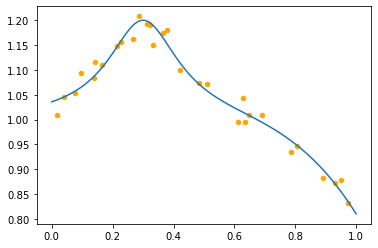

In [5]:
x, y = generate_n_datasets(1, 30)
plt.scatter(x, y, s=20, c='orange')
plt.plot(x_true, y_true)

In [6]:
from copy import deepcopy
from tqdm import tqdm, trange

In [7]:
def calc_bias2_variance(model, datasets_X, datasets_y):
    preds = []
    for X, y in tqdm(zip(datasets_X, datasets_y), total=len(datasets_X)):
        m = deepcopy(model)
        m.fit(X, y)
        preds.append(m.predict(x_true[:, np.newaxis]).squeeze())
    preds = np.array(preds)
    mean_pred = preds.mean(axis=0)
    bias2 = (y_true - mean_pred)**2
    variance = ((preds - mean_pred[np.newaxis,...])**2).mean(axis=0)
    
    return bias2, variance, preds

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [11]:
max_power = 6
powers = np.arange(1, max_power+1)

bias2, variance, preds = [], [], []
for p in powers:
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=p)),
        ('linear', LinearRegression())
    ])
    
    b2, v, p = calc_bias2_variance(model, *generate_n_datasets(1000, 20))
    bias2.append(b2)
    variance.append(v)
    preds.append(p)
    
bias2 = np.array(bias2)
variance = np.array(variance)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1320.59it/s]


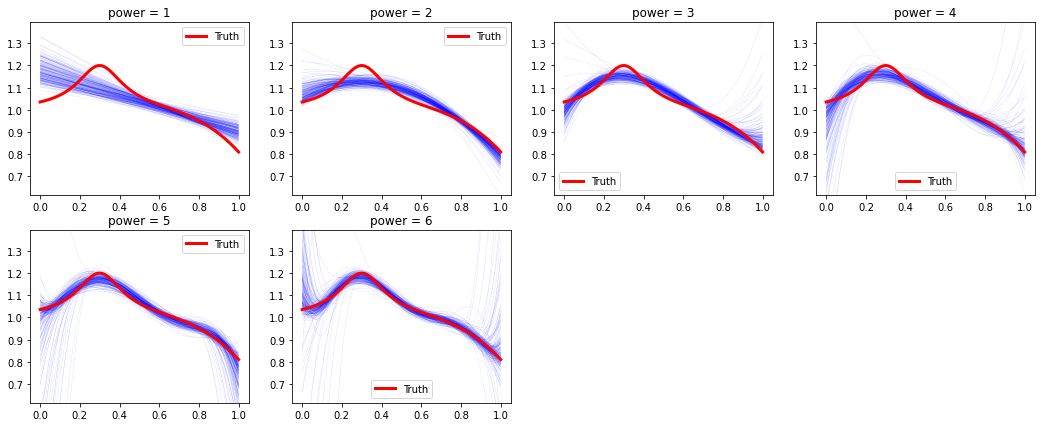

In [24]:
ncols = 4
nrows = int(np.ceil(len(powers) / ncols))
plt.figure(figsize=(18, 3.5*nrows))

y_range = y_true.max() - y_true.min()

for i, (pred, p) in enumerate(zip(preds, powers)):
    plt.subplot(nrows, ncols, i+1)
    for pr in pred[np.random.choice(len(pred), size = 200, replace=False)]:
        plt.plot(x_true, pr, linewidth=0.05, c='blue')
    plt.plot(x_true, y_true, linewidth=3, label='Truth', c='r')
    plt.ylim(y_true.min() - 0.5*y_range, y_true.max() + 0.5*y_range)
    plt.title(f"power = {p}")
    plt.legend()

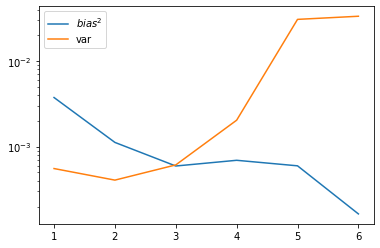

In [29]:
plt.plot(powers, bias2.mean(axis=1), label='$bias^2$')
plt.plot(powers, variance.mean(axis=1), label = 'var')
plt.legend()
plt.yscale('log')